In [ ]:
#Jeffrey Tan and Swan Htet Linn
#CIS 3920
#Term Project

In [ ]:
#Package Installation

install.packages("rpart.plot")
install.packages("caret")
install.packages("GGally")
install.packages("gmodels")
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Library Installation

library(ggplot2)
library(dplyr)
library(rpart)
library(lubridate)
library(datasets)   # library(help = "datasets")
library(tidyverse)  # install.packages("tidyverse"). ggplot2. Details https://www.tidyverse.org
library(caret)      # The caret package (short for Classification And REgression Training)
library(grid)       # grid is a low-level graphics system which provides a great deal of control and flexibility.
#library(gridExtra)  # provides useful extensions to the grid system
#library(GGally)     # Extension to 'ggplot2'. a plotting system based on the grammar of graphics      # Rpart is machine learning library in R that is used for building classification & regression trees
library(rpart.plot) # to plot tree
#library(corrplot)
library(gmodels)

In [ ]:
#Importing dataset

walmart_sales=read.csv(file='Walmart.csv')
summary(walmart_sales)
attach(walmart_sales)

     Store        Date            Weekly_Sales      Holiday_Flag    
 Min.   : 1   Length:2340        Min.   : 215359   Min.   :0.00000  
 1st Qu.:12   Class :character   1st Qu.: 555108   1st Qu.:0.00000  
 Median :23   Mode  :character   Median : 948390   Median :0.00000  
 Mean   :23                      Mean   :1046239   Mean   :0.07692  
 3rd Qu.:34                      3rd Qu.:1421470   3rd Qu.:0.00000  
 Max.   :45                      Max.   :3676389   Max.   :1.00000  
  Temperature      Fuel_Price         CPI         Unemployment   
 Min.   :-2.06   Min.   :2.882   Min.   :127.2   Min.   : 4.420  
 1st Qu.:44.04   1st Qu.:3.355   1st Qu.:133.0   1st Qu.: 7.082  
 Median :60.38   Median :3.580   Median :185.3   Median : 7.852  
 Mean   :58.80   Mean   :3.562   Mean   :171.5   Mean   : 8.082  
 3rd Qu.:73.56   3rd Qu.:3.784   3rd Qu.:214.2   3rd Qu.: 8.523  
 Max.   :99.66   Max.   :4.211   Max.   :223.2   Max.   :14.021  

The following objects are masked from walmart_sales (pos = 4):

    CPI, Date, Fuel_Price, Holiday_Flag, Store, Temperature,
    Unemployment, Weekly_Sales


The following objects are masked from walmart_sales (pos = 8):

    CPI, Date, Fuel_Price, Holiday_Flag, Store, Temperature,
    Unemployment, Weekly_Sales


The following objects are masked from walmart_sales (pos = 22):

    CPI, Date, Fuel_Price, Holiday_Flag, Store, Temperature,
    Unemployment, Weekly_Sales




In [ ]:
#Summary to determine the categorization of Weekly Sales

summary(Weekly_Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 215359  555108  948390 1046239 1421470 3676389 

dfmonth,Monthly_Sales_Millions
<chr>,<dbl>
01,163.7040
02,186.3313
03,179.3564
04,226.5265
05,181.6482
06,189.7734
07,229.9114
08,188.5993
09,220.8477


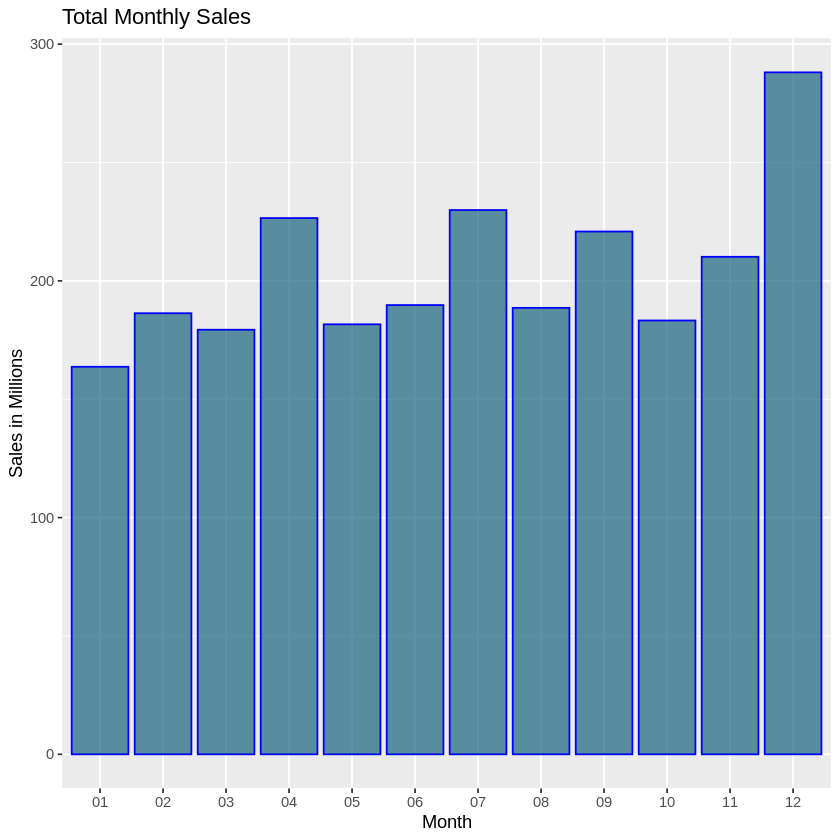

In [ ]:
#Grouping sales into months
#Rescaling sales by dividing in millions for easier intepretation
#Bargraph to visualize sales pattern

df <- walmart_sales[c(2,3)]
dfmonth <- strftime(df$Date, "%m")
data_aggr1 <- cbind(dfmonth, df)
data_aggr1$Date	 <- NULL
monthly_sales <- data_aggr1 %>% group_by(dfmonth) %>%
  summarize(Monthly_Sales_Millions = sum(Weekly_Sales)/1000000)
monthly_sales
ggplot(monthly_sales, aes(x=dfmonth, y=Monthly_Sales_Millions)) + 
  geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7), stat = "identity") +
  ggtitle("Total Monthly Sales") +
  xlab("Month") + ylab("Sales in Millions")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



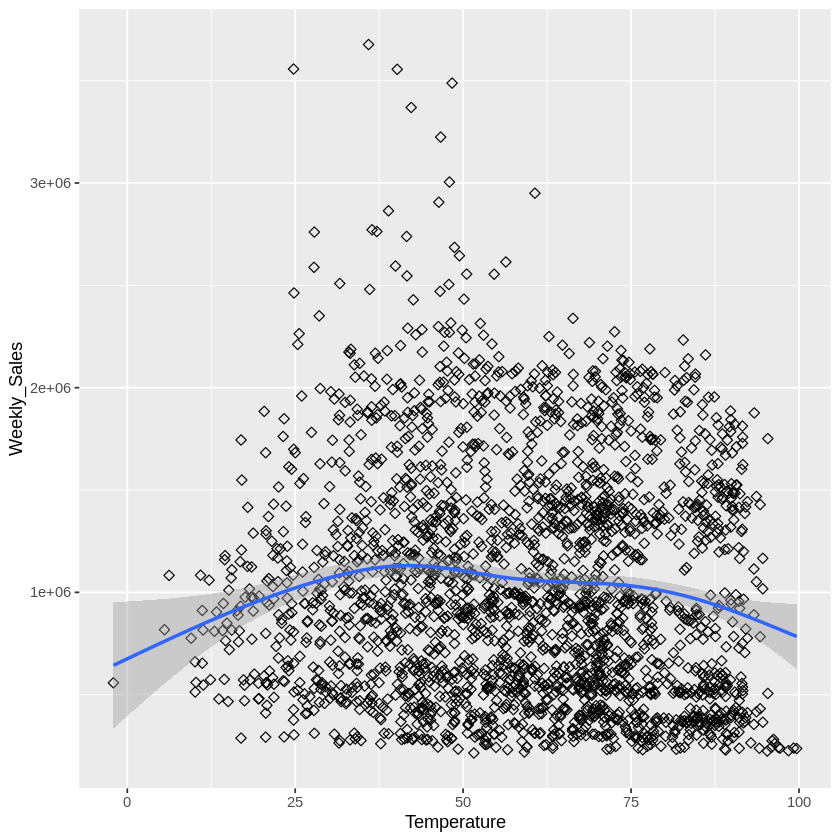

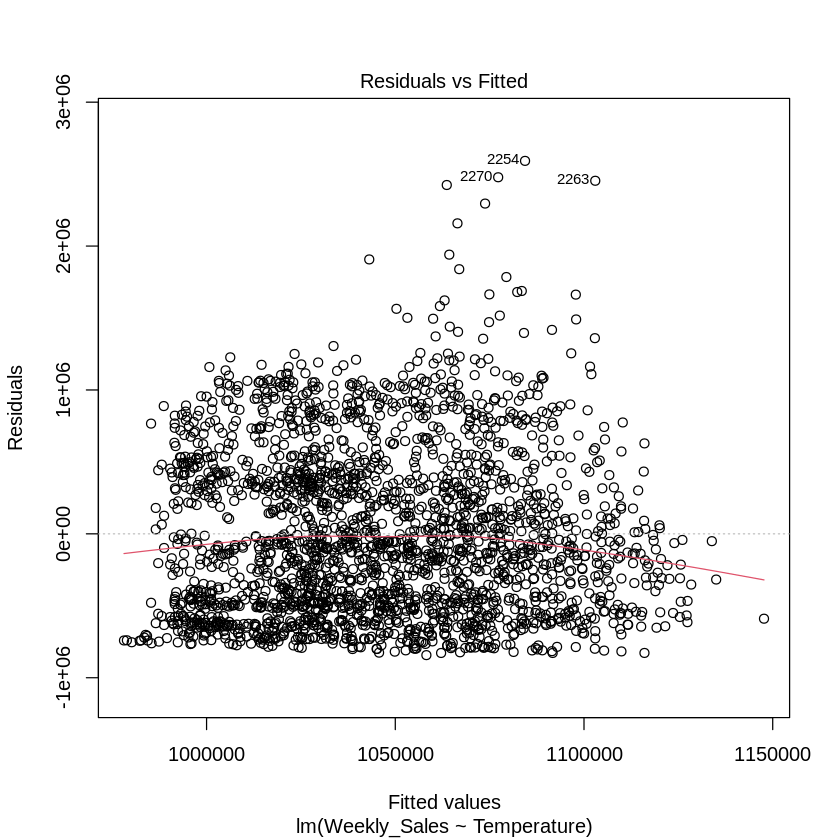

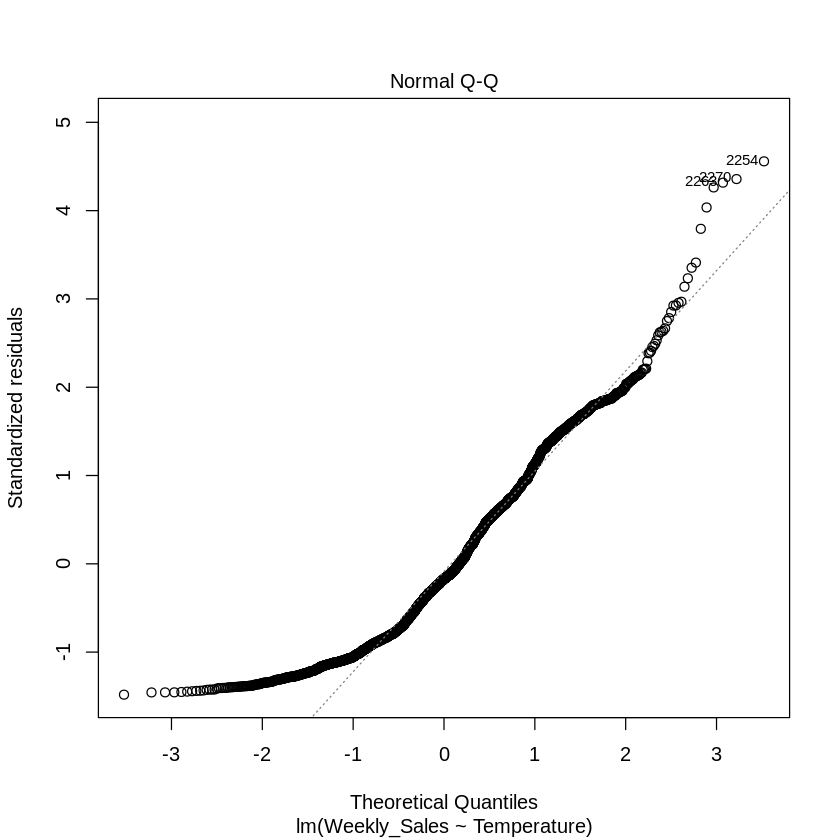

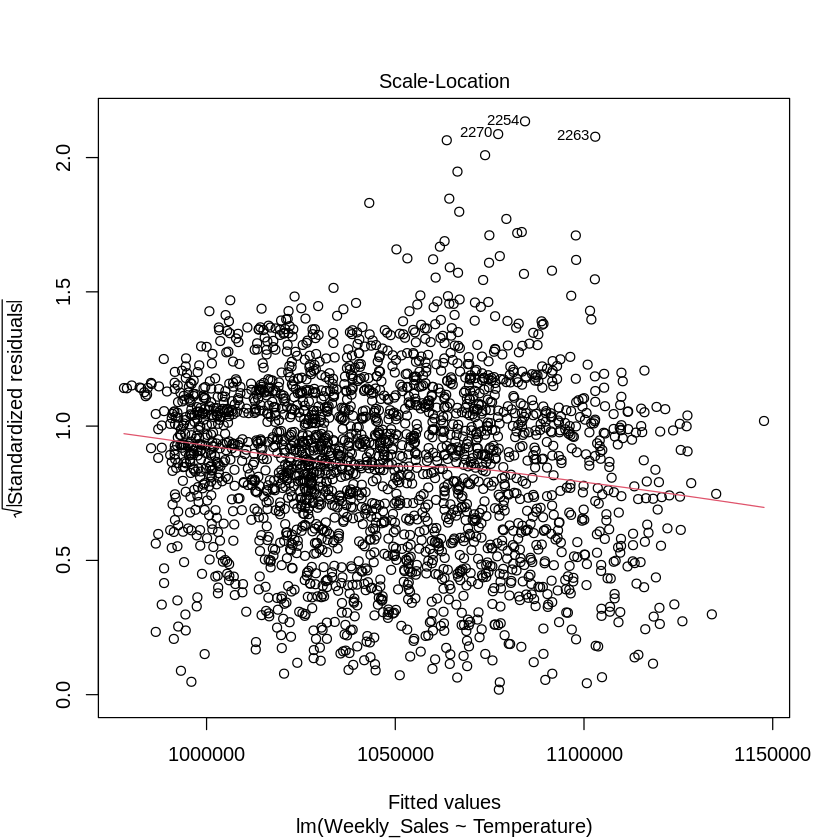

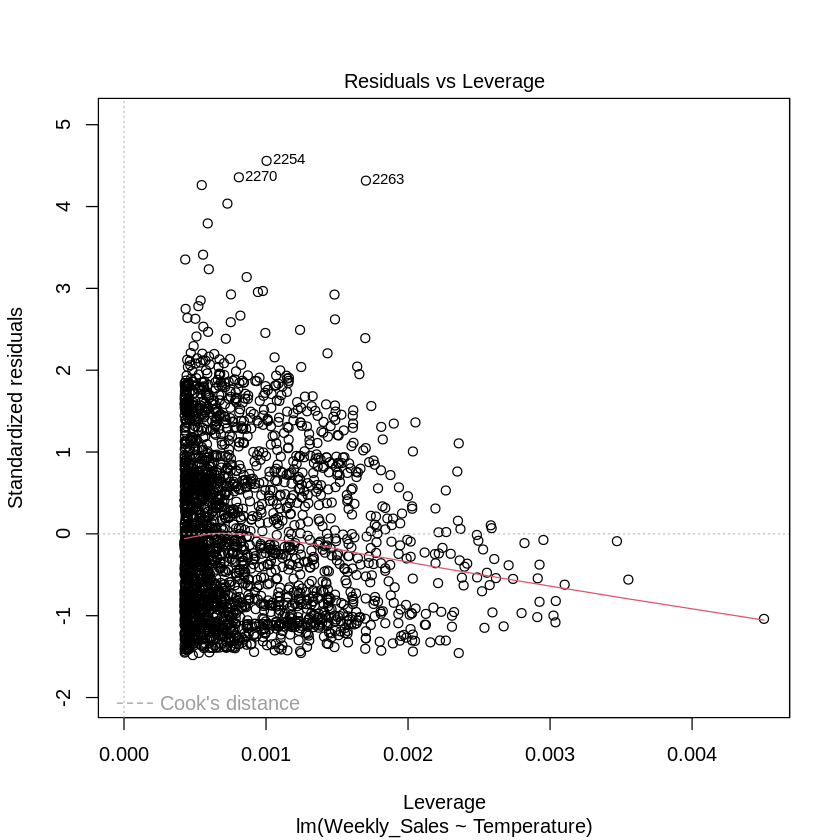

In [89]:
temp <- walmart_sales[c(3,5)]

ggplot(temp, aes(x=Temperature, y=Weekly_Sales)) +
  geom_point(size=2, shape=23)+
  geom_smooth(method="auto", se=TRUE, fullrange=FALSE, level=0.95)

plot(lm(Weekly_Sales ~ Temperature, data = temp))

In [ ]:
#Categorizing quantitative values of temperature to qualitative values

temp <- walmart_sales[c(3,5,6,8)]

temp2 <- mutate(temp, temp_class = ifelse(temp$Temperature > 10 & temp$Temperature < 25, 'Cold',
                                  ifelse(temp$Temperature > 25 & temp$Temperature < 45, 'Cool',
                                         ifelse(temp$Temperature > 45 & temp$Temperature < 65, 'Warm',
                                                ifelse(temp$Temperature > 65, 'Hot','Cold')))))
temp2


Weekly_Sales,Temperature,Fuel_Price,Unemployment,temp_class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1444732.3,48.27,2.976,7.742,Warm
1758050.8,44.69,2.976,8.028,Cool
378241.3,53.35,2.976,7.551,Warm
1862476.3,39.34,2.980,6.510,Cool
286347.3,48.30,2.976,6.634,Warm
1350441.7,47.78,2.976,6.858,Warm
661163.9,10.09,2.882,8.818,Cold
873065.2,35.77,2.976,6.262,Cool
490981.8,41.82,2.976,6.416,Cool


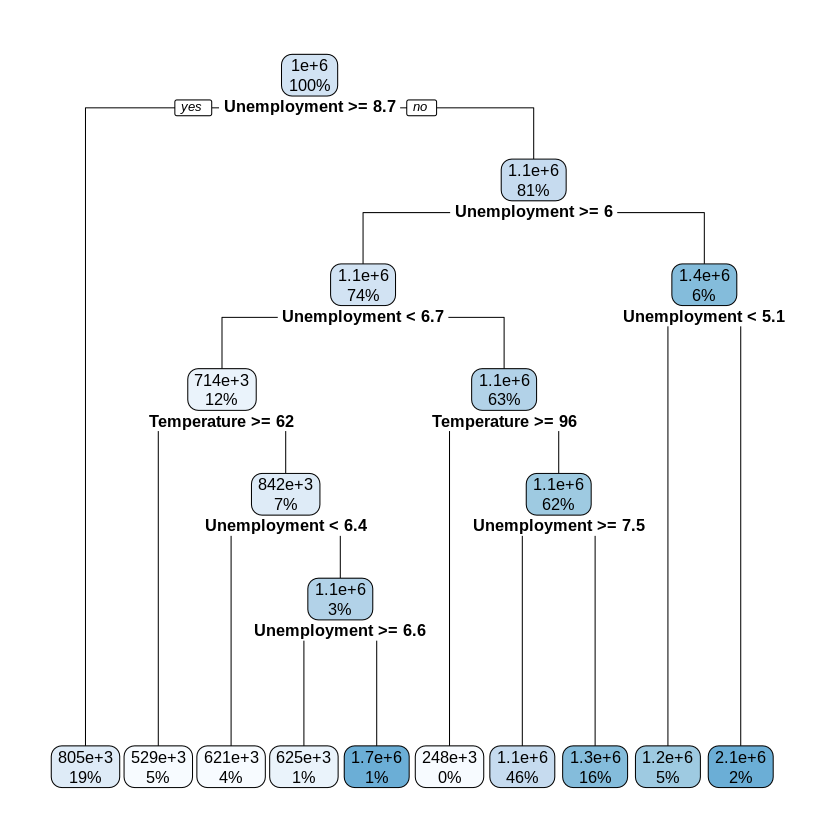

In [ ]:
#Regression Tree based on Temperature

set.seed(100)
train.index = sample(c(1:dim(temp2)[1]), dim(temp2)[1]*.75)
train.temp2 <- temp2[train.index,]
valid.temp2 <- temp2[-train.index,]
regression_tree <- rpart(Weekly_Sales ~ Temperature + Fuel_Price + Unemployment, data = train.temp2, method = "anova")
rpart.plot(regression_tree)

In [90]:
#Categorizing quantitative values of weekly_sales to qualitative values

sales = walmart_sales[c(3,5,6,8)]
sales2 = mutate(sales, sales_class = ifelse(sales$Weekly_Sales < 550000, ' Very Low',
                                      ifelse(sales$Weekly_Sales > 550000 & sales$Weekly_Sales < 950000,'Low',
                                      ifelse(sales$Weekly_Sales > 950000 & sales$Weekly_Sales < 1400000,'Average',
                                      ifelse(sales$Weekly_Sales > 1400000, 'High','Very Low')))))
sales2

Weekly_Sales,Temperature,Fuel_Price,Unemployment,sales_class
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1444732.3,48.27,2.976,7.742,High
1758050.8,44.69,2.976,8.028,High
378241.3,53.35,2.976,7.551,Very Low
1862476.3,39.34,2.980,6.510,High
286347.3,48.30,2.976,6.634,Very Low
1350441.7,47.78,2.976,6.858,Average
661163.9,10.09,2.882,8.818,Low
873065.2,35.77,2.976,6.262,Low
490981.8,41.82,2.976,6.416,Very Low


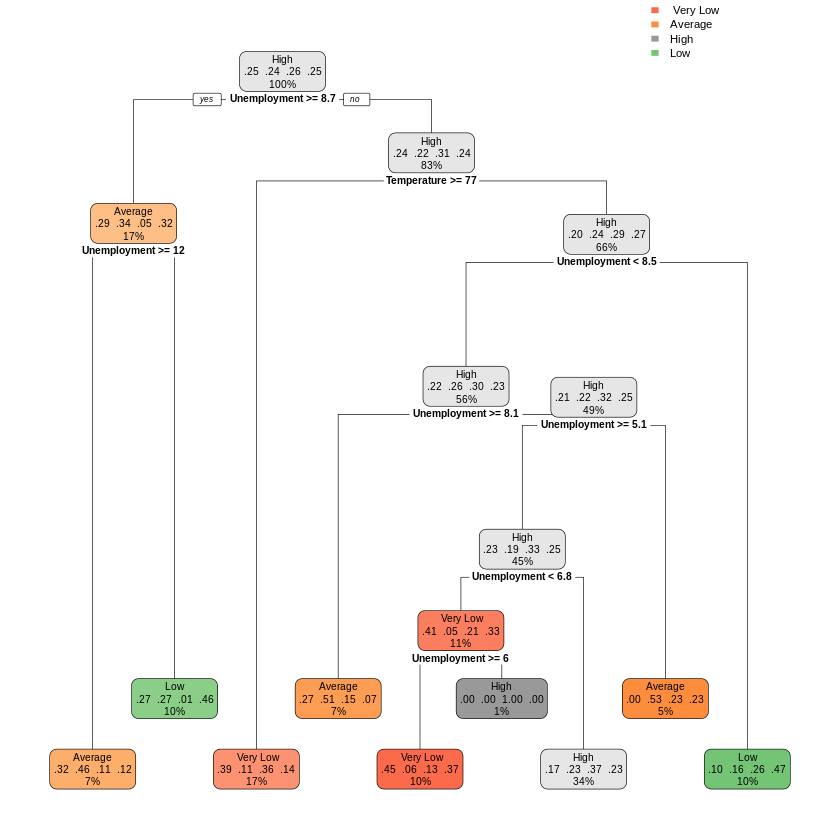

In [ ]:
#Regression Tree based on Sales

set.seed(100)
train.index = sample(c(1:dim(sales2)[1]), dim(sales2)[1]*.75)
train.sales2 <- sales2[train.index,]
valid.sales2 <- sales2[-train.index,]
regression_tree_class <- rpart(sales_class ~ Temperature + Fuel_Price + Unemployment, data = train.sales2, method = "class")
rpart.plot(regression_tree_class)

In [ ]:
#Run prediction on test dataset

Prediction1 = predict(regression_tree_class,newdata=valid.sales2 [-5],type = 'class')
table(Prediction1)

#Print the confusion matrix to check the accuracy

confusionMatrix(Prediction1,valid.sales2$sales_class)

Prediction1
 Very Low   Average      High       Low 
      152        97       212       124 

ERROR: ignored

In [ ]:
#Pruning the decision tree

printcp(regression_tree_class)


Classification tree:
rpart(formula = sales_class ~ Temperature + Fuel_Price + Unemployment, 
    data = train.sales2, method = "class")

Variables actually used in tree construction:
[1] Temperature  Unemployment

Root node error: 1297/1755 = 0.73903

n= 1755 

        CP nsplit rel error  xerror     xstd
1 0.069391      0   1.00000 1.02236 0.013881
2 0.026214      1   0.93061 0.94063 0.014869
3 0.023387      2   0.90439 0.92213 0.015048
4 0.014649      7   0.78643 0.84117 0.015665
5 0.010000      8   0.77178 0.79491 0.015901


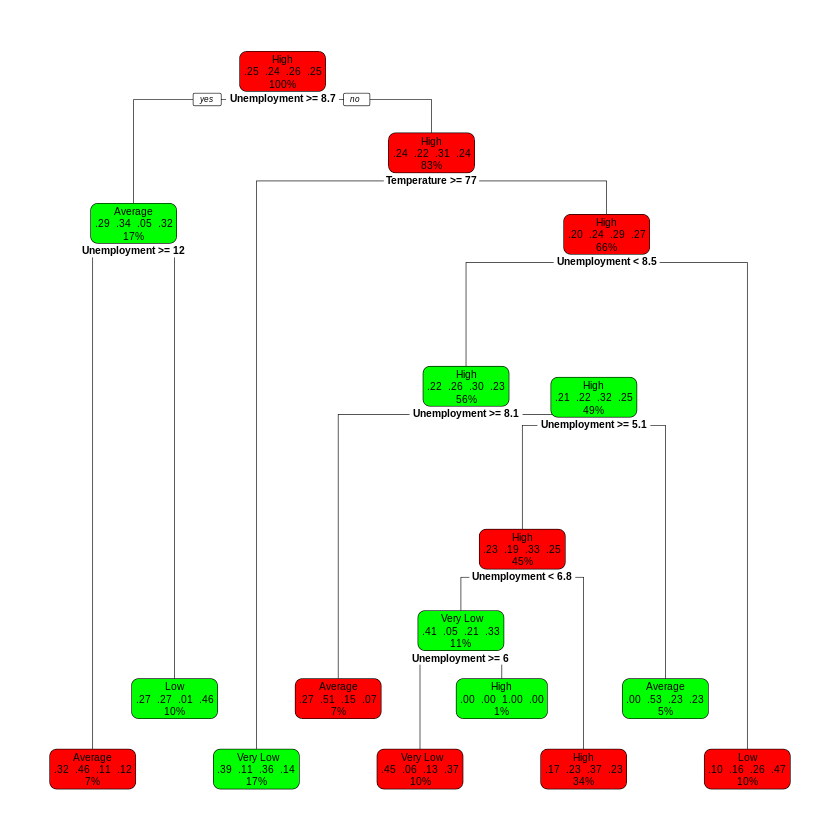

In [ ]:
opt  =  which.min(regression_tree_class$cptable[,'xerror'])

cp =  regression_tree_class$cptable[opt, 'CP']
pruned_model =  prune(regression_tree_class,cp)
rpart.plot(pruned_model, box.col=c("red", "green"))

In [ ]:
rpart_pruned_predict = predict(pruned_model, newdata=valid.sales2[-5],type = 'class')
mn2 = mean(rpart_pruned_predict==valid.sales2$sales_class)
mn2


[1] 0.4547009

In [ ]:
Prediction2 = predict(pruned_model,newdata=valid.sales2 [-5],type = 'class')
table(Prediction2)

#Run confusion matrix to 
confusionMatrix(rpart_pruned_predict,valid.sales2$sales_class)

Prediction2
 Very Low   Average      High       Low 
      152        97       212       124 

ERROR: ignored